# Sequential Pattern Mining

In [324]:
%matplotlib inline

import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fma_metadata import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# SPM of Tags

In [387]:
tracks = utils.load("/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv")

In [388]:
df = tracks['track'][['date_created', 'tags']]

In [389]:
df.head()

,date_created,tags
track_id,,
2,2008-11-26 01:48:12,[]
3,2008-11-26 01:48:14,[]
5,2008-11-26 01:48:20,[]
10,2008-11-25 17:49:06,[]
20,2008-11-26 01:48:56,[]


In [390]:
index_todrop = df[df['tags'].astype(str)=='[]'].index

In [391]:
df.drop(index=index_todrop, axis=0, inplace=True)

In [392]:
df.head()

,date_created,tags
track_id,,
137,2008-11-26 01:43:42,[lafms]
138,2008-11-26 01:43:56,[lafms]
850,2008-11-26 02:22:01,[baltimore]
851,2008-11-26 02:22:04,[baltimore]
852,2008-11-26 02:22:08,[baltimore]


In [393]:
artist = tracks['artist']['name']

In [394]:
df = df.merge(artist, on='track_id')

In [395]:
df['name'].value_counts()

Ars Sonor                          266
Podington Bear                     232
Jared C. Balogh                    229
Jahzzar                            228
Zreen Toyz                         224
                                  ... 
Ayato & Stillborn Blues              1
Mother Tongue                        1
Carbo Flex                           1
Jeremy Harley                        1
Blaise Siwula and Sten Hostfalt      1
Name: name, Length: 4585, dtype: int64

## Restrict SPM on "Ars Sonor"

In [401]:
ars_sonor_seq = df[df['name']=='Ars Sonor']
ars_sonor_seq.set_index('date_created', inplace=True)

In [402]:
ars_sonor_seq = ars_sonor_seq.iloc[:,:-1]

In [403]:
ars_sonor_seq.head()

,tags
date_created,
2013-12-02 18:01:05,[murmure intemporel]
2015-04-18 16:22:11,"[vladimir hirsch, union furnace, teleg, jaan p..."
2015-11-07 11:10:18,"[irina k, elizabeth veldon, suzanne k, laetiti..."
2015-11-07 11:10:18,"[irina k, elizabeth veldon, suzanne k, laetiti..."
2015-11-07 11:10:19,"[irina k, elizabeth veldon, suzanne k, laetiti..."


In [377]:
seq = list()
for i in range(ars_sonor_seq.values.shape[0]):
    for j in ars_sonor_seq.values[i]:
        seq.append(tuple(j))

In [379]:
seq[2]

('irina k', 'elizabeth veldon', 'suzanne k', 'laetitia schteinberg')

In [380]:
from prefixspan import PrefixSpan

In [381]:
ps = PrefixSpan(seq)

In [386]:
ps.frequent(minsup=80)

[(176, ['24-bit']), (117, ['era 3b']), (91, ['era 3b', '24-bit'])]

In [383]:
ps.topk(10, closed=True)

[(176, ['24-bit']),
 (117, ['era 3b']),
 (91, ['era 3b', '24-bit']),
 (41, ['kristin e']),
 (33, ['wallenberg', '24-bit']),
 (33, ['wallenberg', 'era 3b']),
 (27, ['suzanne k']),
 (27, ['the second circle']),
 (26, ['24-bit', 'era 3b']),
 (26, ['era 2'])]

# SPM of Spectral Centroids

In [2]:
df = pd.read_csv('/Users/gaetanoantonicchio/Downloads/ts_dataset.csv')

In [3]:
df.set_index('track_id', inplace=True)

In [4]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [5]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df)
norm_df = norm_df.squeeze()
df = pd.DataFrame(norm_df, index=df.index)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562


In [11]:
# add genres and artists
genres = tracks['track']['genre_top']
artist = tracks['artist']['name']
df = df.merge(genres, on='track_id')
df = df.merge(artist, on='track_id')

In [12]:
df = df[df['genre_top']=='Hip-Hop']

In [13]:
df['name'].value_counts()

The Impossebulls                       68
Kellee Maize                           55
C-Doc                                  42
Tha Silent Partner                     33
6th Sense                              33
                                       ..
Oddish                                  1
Elemint                                 1
K3N                                     1
Talib Kweli                             1
Kellee Maize & J. Glaze & Mike Cash     1
Name: name, Length: 194, dtype: int64

## Restric SPM on "The Impossebulls"

In [15]:
df = df[df['name'] == 'The Impossebulls']

In [17]:
df=df.iloc[:,:-2]

In [142]:
# SAX transform 
n_paa_segments = 60
n_sax_symbols = 20
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(norm_df)

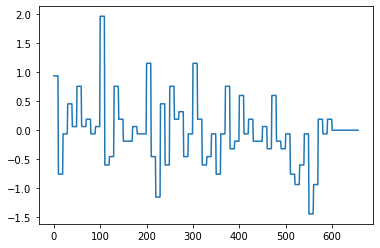

In [169]:
# plot first tranformed ts
plt.plot(ts_sax_inv[0])

In [204]:
ts_sax[0]

array([16,  4,  9, 13, 10, 15, 10, 11,  9, 10, 19,  5,  6, 15, 11,  8,  8,
       10,  9,  9, 17,  6,  2, 13,  5, 15, 11, 12,  6,  9, 17, 11,  5,  6,
        9,  4,  9, 15,  7,  8, 14,  9, 11,  8,  8, 10,  7, 14,  8,  7,  9,
        4,  3,  5,  9,  1,  3, 11,  9, 11])

In [215]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield tuple(l[i:i+n])

In [247]:
# chuck a list into a list of tuples 

seq_lst = []
for track_idx in range(len(ts_sax)):
    single_sequence = []
    
    for seq in (chunks(ts_sax[track_idx], 2)):      #3 events per transaction
        single_sequence.append(seq)        
    seq_lst.append(single_sequence)  

In [248]:
print(seq_lst[0])

[(16, 4), (9, 13), (10, 15), (10, 11), (9, 10), (19, 5), (6, 15), (11, 8), (8, 10), (9, 9), (17, 6), (2, 13), (5, 15), (11, 12), (6, 9), (17, 11), (5, 6), (9, 4), (9, 15), (7, 8), (14, 9), (11, 8), (8, 10), (7, 14), (8, 7), (9, 4), (3, 5), (9, 1), (3, 11), (9, 11)]


In [249]:
from prefixspan import PrefixSpan

In [407]:
#help(PrefixSpan)

In [250]:
ps = PrefixSpan(seq_lst)

In [251]:
ps.topk(10)

[(743, [(8, 7)]),
 (728, [(7, 8)]),
 (727, [(8, 6)]),
 (726, [(7, 7)]),
 (723, [(6, 6)]),
 (716, [(9, 8)]),
 (712, [(10, 9)]),
 (710, [(8, 8)]),
 (694, [(8, 9)]),
 (692, [(5, 5)])]

In [278]:
# frequent takes the number of matches not expressed in percetage.
ps.frequent(len(seq_lst) * 0.18)         #min support  18%

[(728, [(7, 8)]),
 (743, [(8, 7)]),
 (723, [(6, 6)]),
 (726, [(7, 7)]),
 (727, [(8, 6)])]

In [280]:
ps.frequent(len(seq_lst) * 0.14)         #min support  14%

[(639, [(10, 11)]),
 (628, [(9, 10)]),
 (587, [(11, 8)]),
 (631, [(8, 10)]),
 (683, [(9, 9)]),
 (619, [(11, 12)]),
 (570, [(6, 9)]),
 (644, [(5, 6)]),
 (728, [(7, 8)]),
 (743, [(8, 7)]),
 (601, [(9, 11)]),
 (587, [(5, 7)]),
 (631, [(5, 4)]),
 (712, [(10, 9)]),
 (594, [(12, 12)]),
 (619, [(10, 7)]),
 (624, [(6, 8)]),
 (651, [(4, 5)]),
 (560, [(5, 8)]),
 (674, [(6, 5)]),
 (694, [(8, 9)]),
 (723, [(6, 6)]),
 (621, [(4, 4)]),
 (595, [(7, 9)]),
 (674, [(10, 8)]),
 (726, [(7, 7)]),
 (631, [(11, 9)]),
 (611, [(10, 12)]),
 (727, [(8, 6)]),
 (629, [(7, 10)]),
 (692, [(5, 5)]),
 (586, [(12, 11)]),
 (716, [(9, 8)]),
 (671, [(7, 5)]),
 (710, [(8, 8)]),
 (676, [(11, 10)]),
 (661, [(6, 7)]),
 (634, [(11, 11)]),
 (679, [(9, 7)]),
 (589, [(12, 10)]),
 (578, [(9, 6)]),
 (667, [(7, 6)]),
 (681, [(10, 10)]),
 (602, [(8, 11)]),
 (561, [(13, 13)])]